# Analyse des Verhaltens von Benutzer 53

Das Verhalten des definierten Benutzers wird nachfolgend im Kontext verschiedener Merkmale und Zeiträume betrachtet.

**Vermutlicher Status**
Student im Bachelor-Studiengang Wirtschaftsingenieurwesen Online (BWIO)

### Definition des Benutzers

In [34]:
specified_user = 53

### Import von Bibliotheken und anderen Erweiterungen

In [35]:
from sqlalchemy import create_engine
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [36]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [37]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [38]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [39]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Auswahl der Arbeitsdaten

In [40]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Gegenstand der Untersuchungen sind nur Datensätze mit einer bestimmten userid
moodle_data = moodle_data[moodle_data.userid == specified_user]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
14054,27502,2,53,29,viewed,\core\event\user_profile_viewed,user,1593,2020-10-23 14:57:02,,0
39603,0,0,53,0,loggedin,\core\event\user_loggedin,user,37806,2020-10-12 04:25:36,,0
39604,0,0,53,53,viewed,\core\event\dashboard_viewed,,0,2020-10-12 04:25:37,,0
39605,27502,2,53,0,viewed,\core\event\course_viewed,,0,2020-10-12 04:25:42,,0
39606,27502,2,53,0,viewed,\mod_resource\event\course_module_viewed,resource,202381,2020-10-12 04:25:46,,0
...,...,...,...,...,...,...,...,...,...,...,...
966489,28256,2,53,0,viewed,\core\event\course_viewed,,0,2021-06-03 06:38:49,,0
966490,28256,2,53,0,viewed,\core\event\course_viewed,,0,2021-06-03 06:38:57,,0
966491,28256,2,53,0,viewed,\core\event\course_viewed,,0,2021-06-03 06:39:00,,0
966492,28256,2,53,0,viewed,\core\event\course_viewed,,0,2021-06-03 06:39:18,,0


### Menge der unterschiedlichen Werte pro Tabellenmerkmal

In [41]:
attributes = moodle_data.nunique()
display(attributes)

courseid                 33
Studiengang               2
userid                    1
relateduserid            15
action                   16
eventname                67
objecttable              34
objectid                689
timecreated           10508
course_module_type        2
instanceid                2
dtype: int64

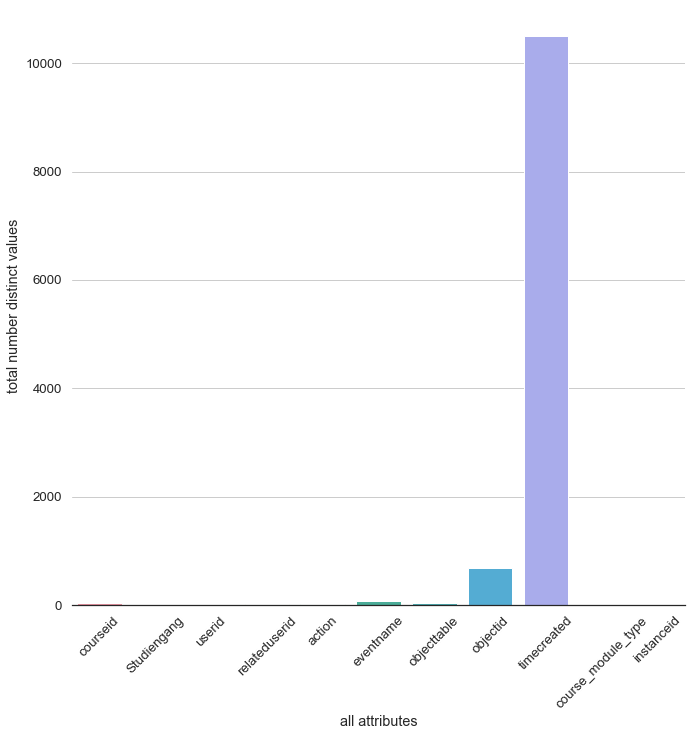

In [42]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(attributes.count(), attributes.count())) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
result = attributes
# Visualisierung der Menge der unterschiedlichen Werte pro Tabellenmerkmal
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('all attributes')
chart.set_ylabel('total number distinct values')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Studiengang

In [43]:
studies = moodle_data.Studiengang.groupby(moodle_data.Studiengang).count()
display(studies)

Studiengang
0    3853
2    7846
Name: Studiengang, dtype: int64

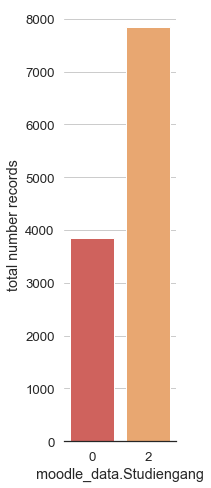

In [44]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(studies.count(), 8)) # Größe der Visualisierung (in inch)

# Ermittlung der Menge der Log-Einträge pro Studiengang
result = studies
# Visualisierung der Menge der Log-Einträge pro Studiengang
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.Studiengang')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Kurs

In [45]:
courses = moodle_data.courseid.groupby(moodle_data.courseid).count()
display(courses.sort_values())

courseid
1           2
25910       3
28260       7
25038       7
25912       7
25911       8
25043       9
25918      12
1750       14
26762      14
25039      19
26764      22
27562      32
26761      72
28265      83
28267      86
26759     100
28255     107
28229     120
28258     132
27502     161
4217      188
27503     259
27515     262
27501     527
27498     541
28256     570
27499     606
27512     778
28259     968
4245     1016
27500    1249
0        3718
Name: courseid, dtype: int64

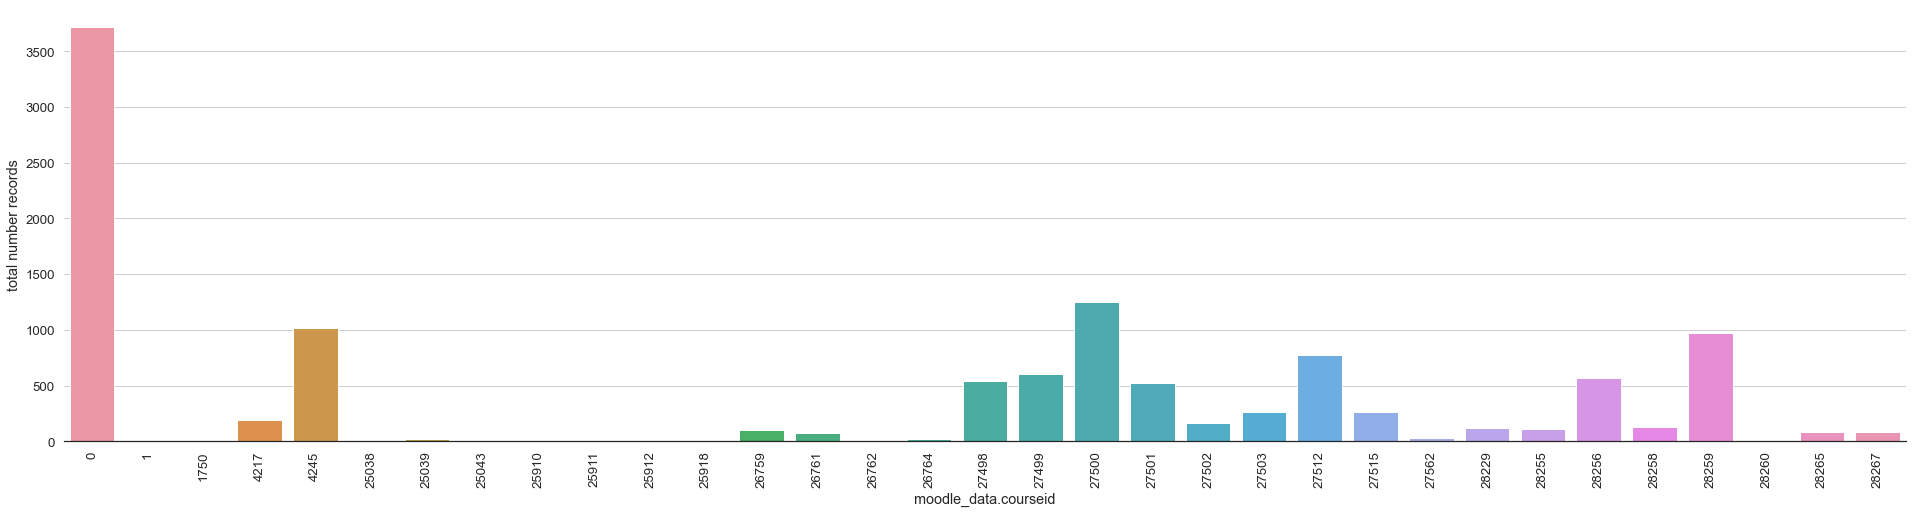

In [46]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(courses.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Kurs
result = courses
# Visualisierung der Menge der Log-Einträge pro Kurs
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.courseid')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Action

In [47]:
actions = moodle_data.action.groupby(moodle_data.action).count()
display(actions)

action
added            2
created         35
deleted          2
failed         173
graded          10
joined          18
left             2
loggedin       757
loggedout        3
reviewed        30
sent            30
started          9
submitted       34
updated         46
uploaded        28
viewed       10520
Name: action, dtype: int64

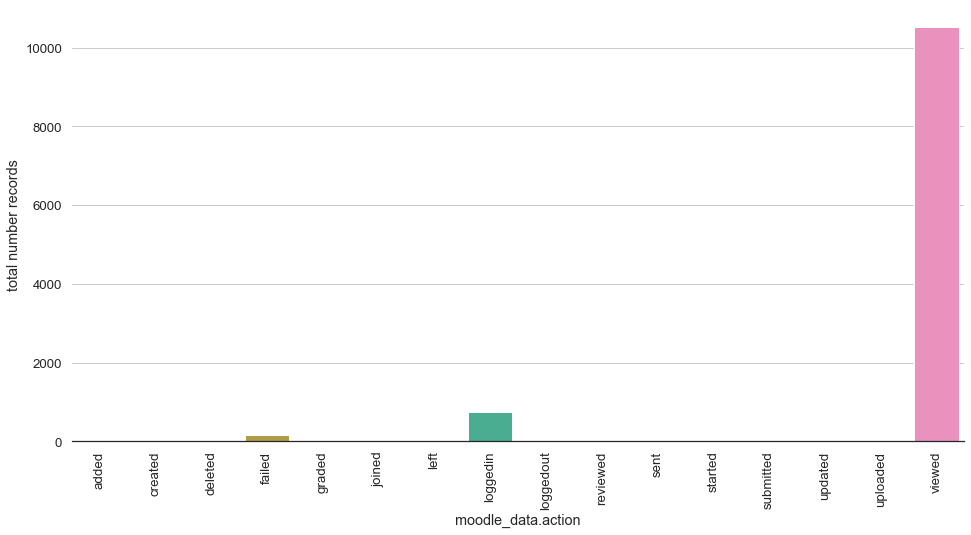

In [48]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(actions.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Action
result = actions
# Visualisierung der Menge der Log-Einträge pro Action
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.action')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Eventname

In [49]:
eventtypes = moodle_data.eventname.groupby(moodle_data.eventname).count()
display(eventtypes)

eventname
\assignsubmission_file\event\assessable_uploaded     21
\assignsubmission_file\event\submission_created      17
\assignsubmission_file\event\submission_updated       4
\core\event\badge_listing_viewed                      4
\core\event\course_category_viewed                    8
                                                   ... 
\mod_wiki\event\course_module_viewed                169
\mod_wiki\event\page_diff_viewed                      1
\mod_wiki\event\page_history_viewed                   9
\mod_wiki\event\page_map_viewed                       5
\mod_wiki\event\page_viewed                           2
Name: eventname, Length: 67, dtype: int64

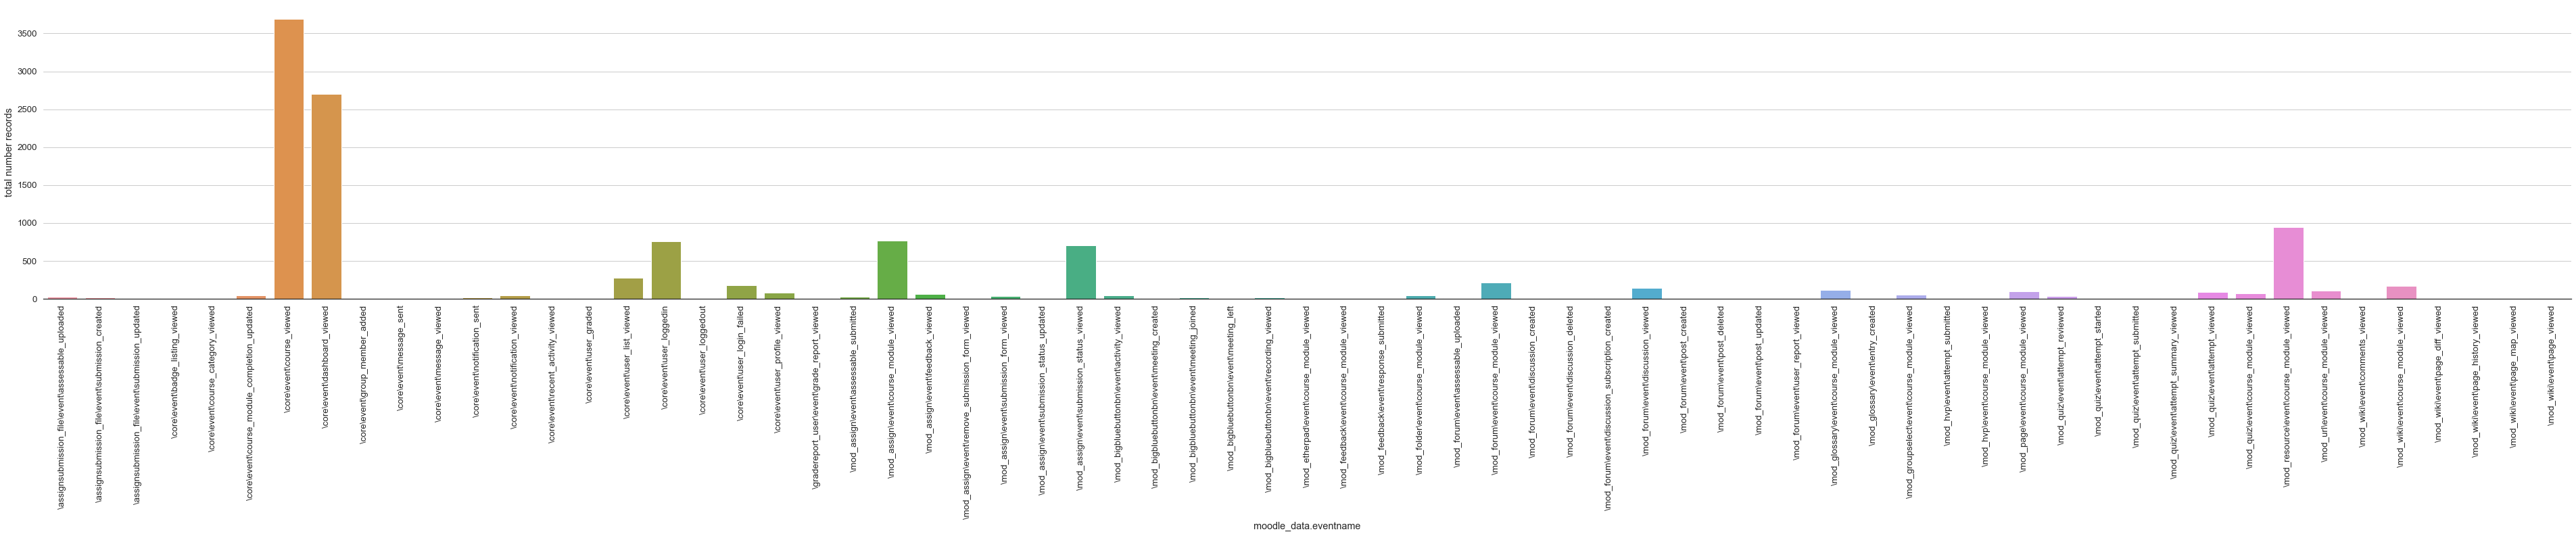

In [50]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(eventtypes.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Eventname
result = eventtypes
# Visualisierung der Menge der Log-Einträge pro Eventname
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.eventname')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Objecttable

In [51]:
objecttables = moodle_data.objecttable.groupby(moodle_data.objecttable).count()
display(objecttables)

objecttable
                             7332
assign                        764
assign_grades                  57
assign_submission              43
assignsubmission_file          21
bigbluebuttonbn                88
course                        276
course_categories               8
course_modules_completion      40
etherpad                        1
feedback                        2
feedback_completed              1
folder                         46
forum                         210
forum_discussion_subs           5
forum_discussions             147
forum_posts                    11
glossary                      113
glossary_entries                2
grade_grades                   10
groups                          2
groupselect                    54
hvp                            11
message_user_actions            7
messages                       10
notifications                  59
page                           93
quiz                           68
quiz_attempts                 142
re

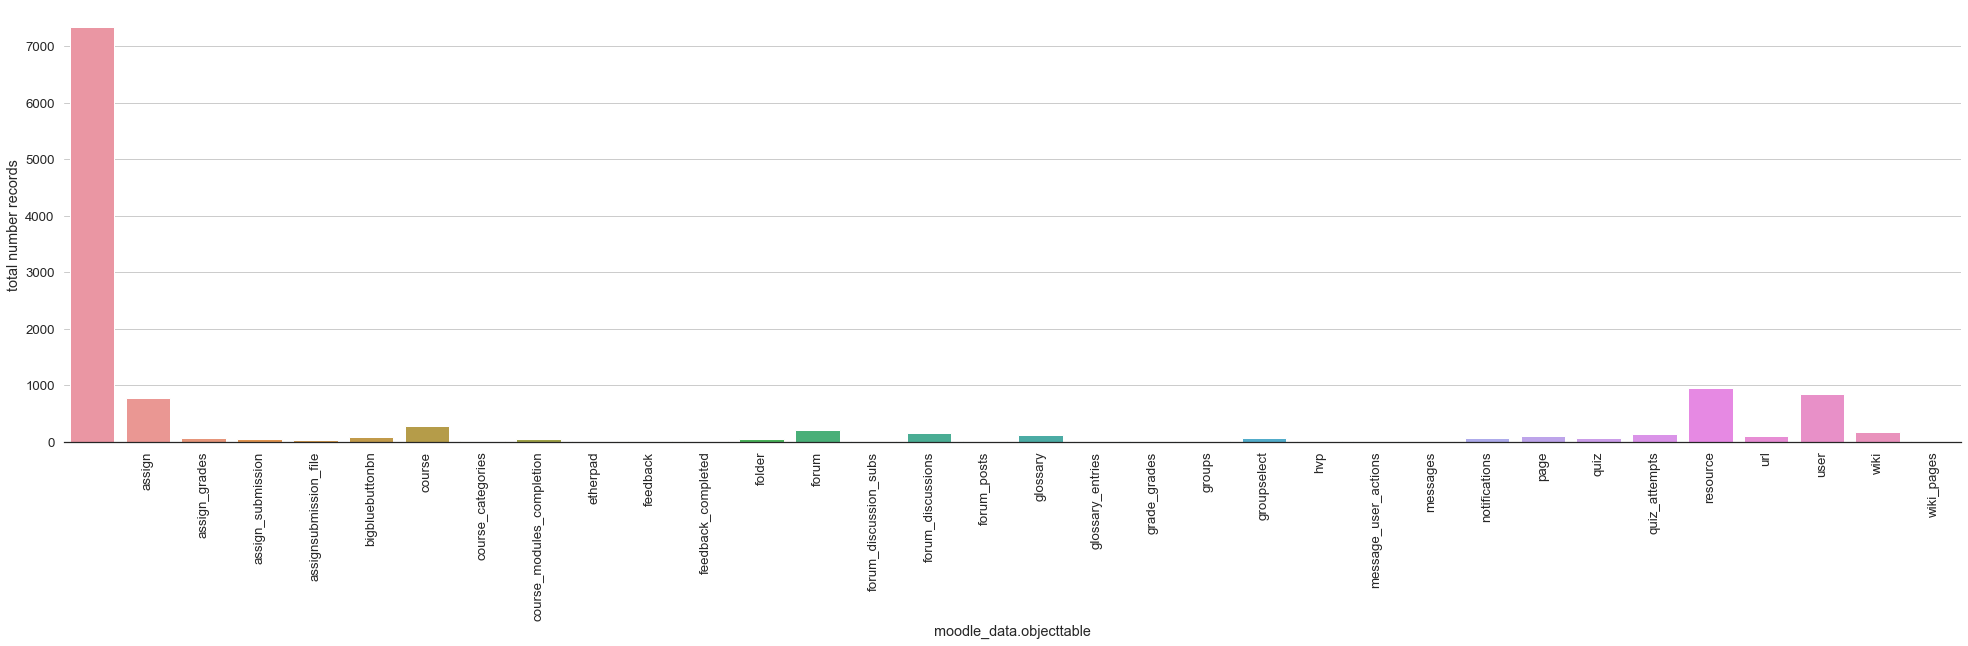

In [52]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(objecttables.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Objecttable
result = objecttables
# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.objecttable')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Coursemoduletype

In [53]:
course_module_types = moodle_data.course_module_type.groupby(moodle_data.course_module_type).count()
display(course_module_types)

course_module_type
         11679
s:54:       20
Name: course_module_type, dtype: int64

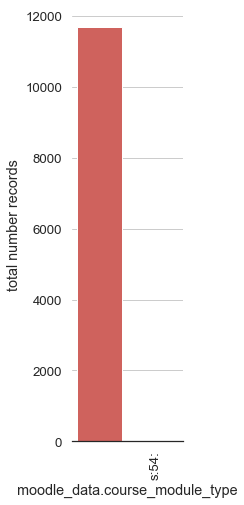

In [54]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(course_module_types.count(), 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Ermittlung der Menge der Log-Einträge pro Coursemoduletype
result = course_module_types
# Visualisierung der Menge der Log-Einträge pro Coursemoduletype
chart = sns.barplot(x=result.index, y=result)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.course_module_type')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Tagesstunde

In [55]:
# Ausgabe der Tagesstunden der protokollierten Log-Einträge
hours_per_day = moodle_data.timecreated.dt.hour.sort_values()
display(hours_per_day)

782660     0
782659     0
782658     0
53034      1
53036      1
          ..
445884    23
346666    23
346665    23
346664    23
346663    23
Name: timecreated, Length: 11699, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde**

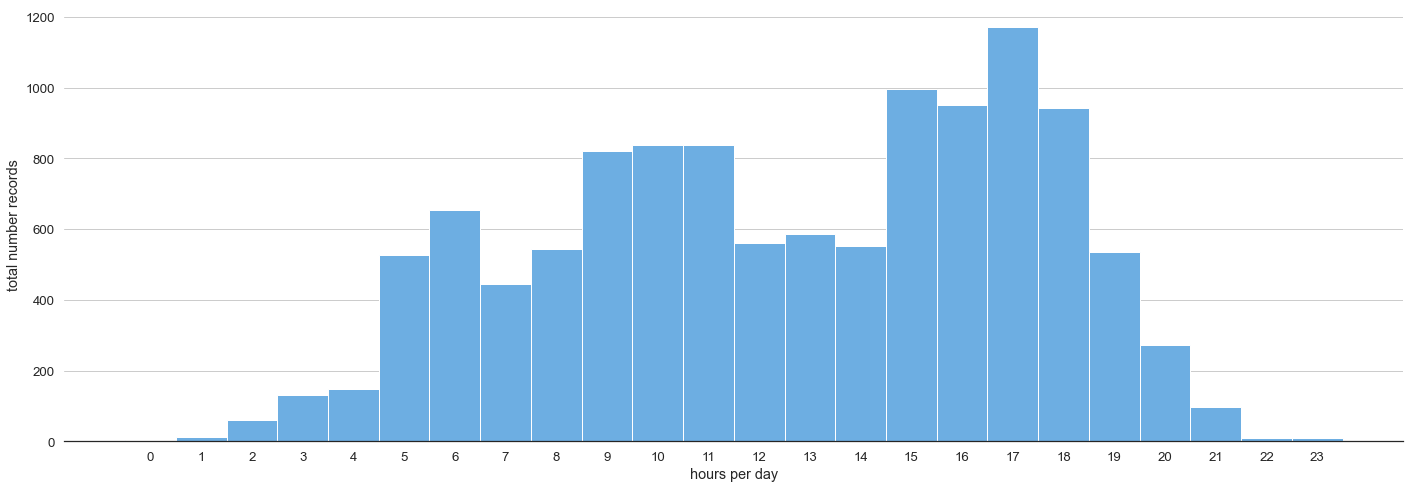

In [56]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde
chart = sns.histplot(hours_per_day, bins=24, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang**

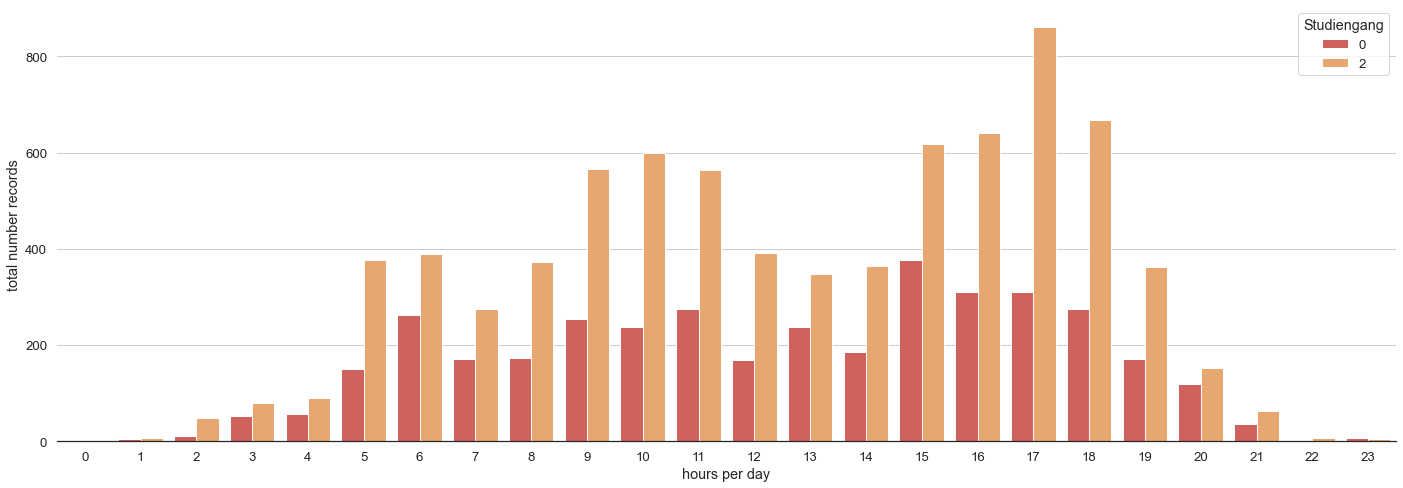

In [57]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Tagesstunde und Studiengang
chart = sns.countplot(x=hours_per_day, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden**

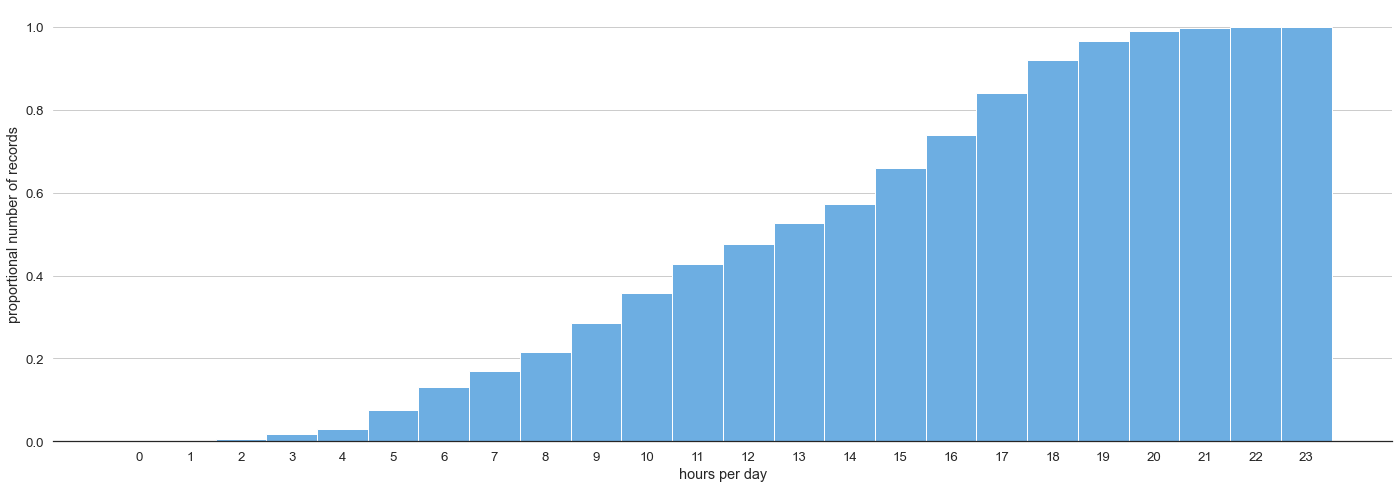

In [58]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Tagesstunden
chart = sns.histplot(hours_per_day, bins=24, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden**

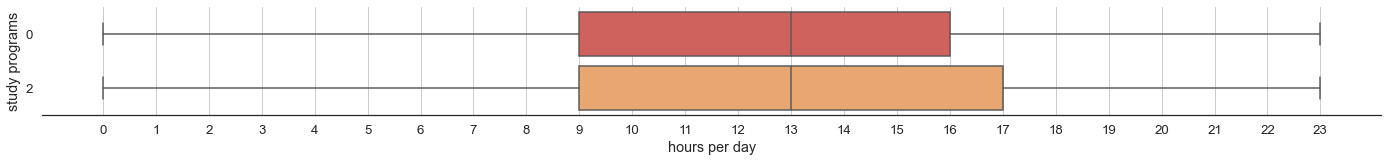

In [59]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, studies.count()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden**

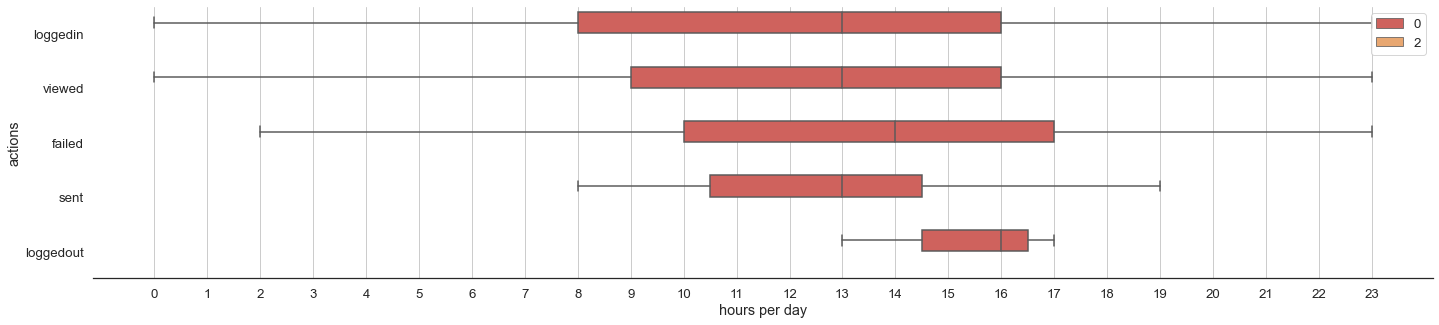

In [60]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Tagesstunden
chart = sns.boxplot(x=hours_per_day, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 24, 1))
chart.set_xlabel('hours per day')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

### Menge der Log-Einträge pro Wochentag

In [61]:
# Ausgabe der Wochentage der protokollierten Log-Einträge
days_per_week = moodle_data.timecreated.dt.weekday.sort_values()
display(days_per_week)

734865    0
735196    0
735195    0
735193    0
735192    0
         ..
571463    6
571462    6
571461    6
59831     6
642075    6
Name: timecreated, Length: 11699, dtype: int64

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag**

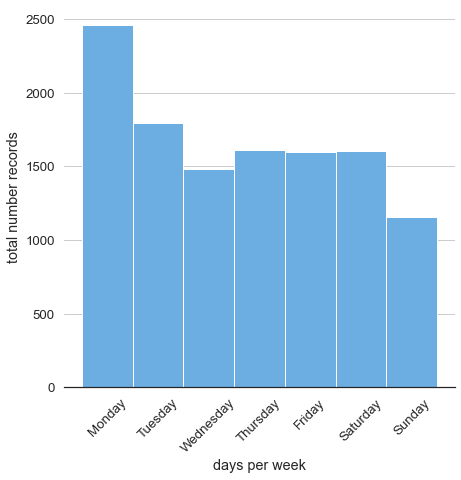

In [62]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag
chart = sns.histplot(days_per_week, bins=7, discrete=True, color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang**

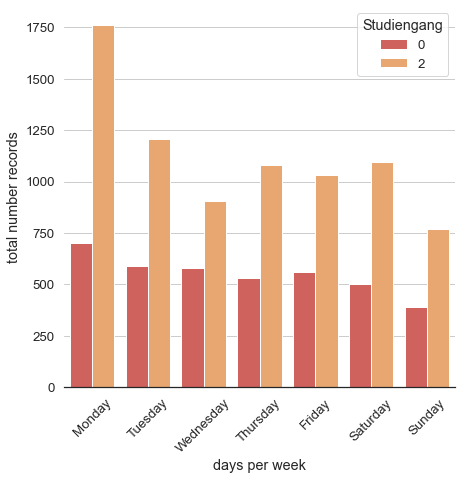

In [63]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Wochentag und Studiengang
chart = sns.countplot(x=days_per_week, hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='Studiengang', labels=studies.index)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage**

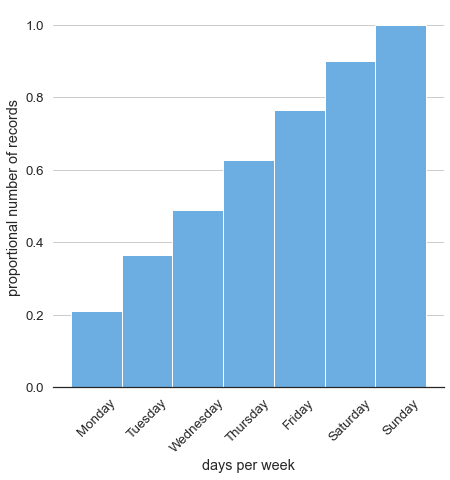

In [64]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(7, 7))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der kumulierten Mengen der Log-Einträge über alle Wochentage
chart = sns.histplot(days_per_week, bins=7, discrete=True, cumulative=True, stat='proportion', color='#6DAEE2', alpha=1)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('proportional number of records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage**

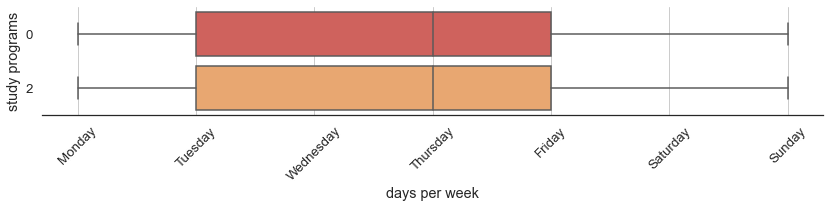

In [65]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, studies.count()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.Studiengang, order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('study programs')
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage**

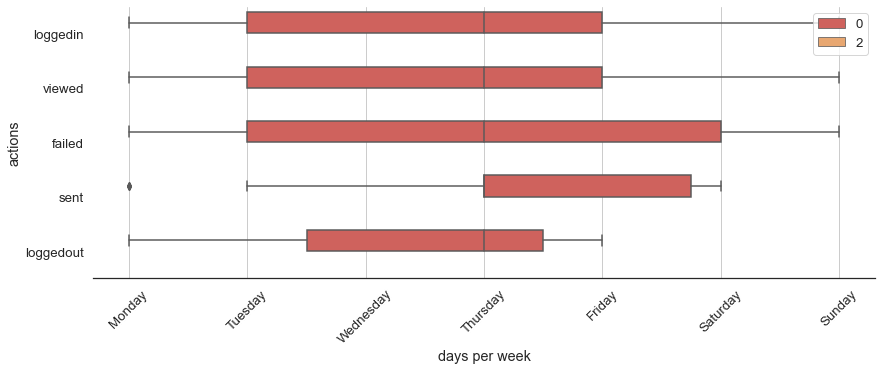

In [66]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(14, moodle_data.action[moodle_data.Studiengang.astype(int) == 0].nunique()))  # Größe der Visualisierung (in inch)
plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Merkmal und Studiengang über alle Wochentage
chart = sns.boxplot(x=days_per_week, y=moodle_data.action[moodle_data.Studiengang.astype(int) == 0], orient='h', hue=moodle_data.Studiengang, hue_order=studies.index)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='x')
chart.xaxis.set_ticks(range(0, 7, 1))
chart.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
chart.set_xlabel('days per week')
chart.set_ylabel('actions')
sns.despine(left=True)
plt.legend(loc='upper right')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()